***#Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras***

In [1]:
!pip install matplotlib

**#Load The Dataset**

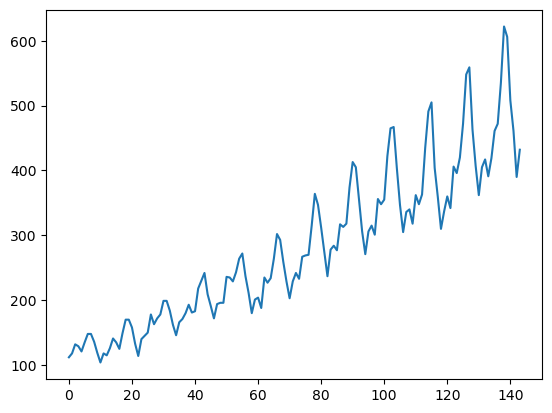

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv(r'E:\Gen_Ai\airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [5]:
!pip install tensorflow

**#Import The Required Packages**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
# fix random seed for reproducibility
tf.random.set_seed(1)

In [7]:
# load the dataset
dataframe = pd.read_csv(r'E:\Gen_Ai\airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

**#Converted into one Scaler**

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

**#Train(23%) and Test(77%) The dataset**

In [11]:
# split into train and test sets
train_size = int(len(dataset) * 0.77)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

110 34


In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [17]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
trainX

array([[[0.01544401, 0.02702703]],

       [[0.02702703, 0.05405405]],

       [[0.05405405, 0.04826255]],

       [[0.04826255, 0.03281853]],

       [[0.03281853, 0.05984557]],

       [[0.05984557, 0.08494207]],

       [[0.08494207, 0.08494207]],

       [[0.08494207, 0.06177607]],

       [[0.06177607, 0.02895753]],

       [[0.02895753, 0.        ]],

       [[0.        , 0.02702703]],

       [[0.02702703, 0.02123553]],

       [[0.02123553, 0.04247104]],

       [[0.04247104, 0.07142857]],

       [[0.07142857, 0.05984557]],

       [[0.05984557, 0.04054055]],

       [[0.04054055, 0.08687258]],

       [[0.08687258, 0.12741312]],

       [[0.12741312, 0.12741312]],

       [[0.12741312, 0.10424709]],

       [[0.10424709, 0.05598456]],

       [[0.05598456, 0.01930502]],

       [[0.01930502, 0.06949806]],

       [[0.06949806, 0.07915059]],

       [[0.07915059, 0.08880308]],

       [[0.08880308, 0.14285713]],

       [[0.14285713, 0.11389962]],

       [[0.11389962, 0.13127

In [21]:
testX

array([[[0.4980695 , 0.47104248]],

       [[0.47104248, 0.49999997]],

       [[0.49999997, 0.6389961 ]],

       [[0.6389961 , 0.7471043 ]],

       [[0.7471043 , 0.7741313 ]],

       [[0.7741313 , 0.57915056]],

       [[0.57915056, 0.492278  ]],

       [[0.492278  , 0.3976834 ]],

       [[0.3976834 , 0.44980696]],

       [[0.44980696, 0.49420848]],

       [[0.49420848, 0.45945945]],

       [[0.45945945, 0.5830116 ]],

       [[0.5830116 , 0.5637065 ]],

       [[0.5637065 , 0.61003864]],

       [[0.61003864, 0.71042466]],

       [[0.71042466, 0.8571429 ]],

       [[0.8571429 , 0.8783784 ]],

       [[0.8783784 , 0.69305015]],

       [[0.69305015, 0.5849421 ]],

       [[0.5849421 , 0.4980695 ]],

       [[0.4980695 , 0.58108103]],

       [[0.58108103, 0.6042471 ]],

       [[0.6042471 , 0.554054  ]],

       [[0.554054  , 0.60810804]],

       [[0.60810804, 0.6891892 ]],

       [[0.6891892 , 0.71042466]],

       [[0.71042466, 0.8320464 ]],

       [[0.8320464 , 1.     

**Implimented The LSTM Network**

In [23]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 - 2s - 22ms/step - loss: 0.0267
Epoch 2/100
107/107 - 0s - 3ms/step - loss: 0.0103
Epoch 3/100
107/107 - 0s - 3ms/step - loss: 0.0082
Epoch 4/100
107/107 - 0s - 2ms/step - loss: 0.0070
Epoch 5/100
107/107 - 0s - 2ms/step - loss: 0.0060
Epoch 6/100
107/107 - 0s - 2ms/step - loss: 0.0053
Epoch 7/100
107/107 - 0s - 2ms/step - loss: 0.0048
Epoch 8/100
107/107 - 0s - 2ms/step - loss: 0.0045
Epoch 9/100
107/107 - 0s - 3ms/step - loss: 0.0043
Epoch 10/100
107/107 - 0s - 2ms/step - loss: 0.0042
Epoch 11/100
107/107 - 0s - 2ms/step - loss: 0.0041
Epoch 12/100
107/107 - 0s - 2ms/step - loss: 0.0041
Epoch 13/100
107/107 - 0s - 4ms/step - loss: 0.0041
Epoch 14/100
107/107 - 0s - 2ms/step - loss: 0.0040
Epoch 15/100
107/107 - 0s - 2ms/step - loss: 0.0040
Epoch 16/100
107/107 - 0s - 2ms/step - loss: 0.0040
Epoch 17/100
107/107 - 0s - 2ms/step - loss: 0.0039
Epoch 18/100
107/107 - 0s - 3ms/step - loss: 0.0039
Epoch 19/100
107/107 - 0s - 2ms/step - loss: 0.0039
Epoch 20/100
107/107 - 0s - 3ms/

**Predict The Train and Test Scores**

In [24]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Train Score: 26.45 RMSE
Test Score: 55.55 RMSE


**Dataset Visualization**

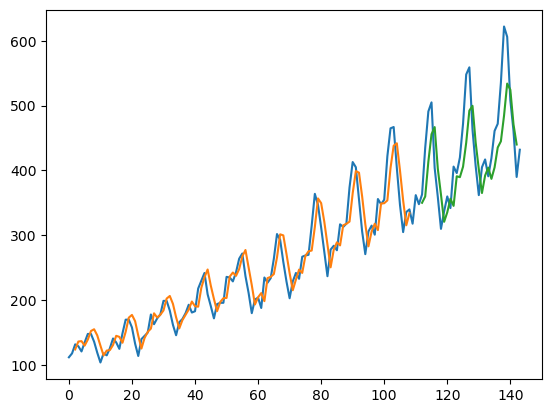

In [27]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()